STEPS
1. DONE: Format and subset for columns and respondents of interest
2. Scale and normalize values
3. Run Principal Component Analysis (PCA)
4. Examine which components correlate with which variables
5. Generate elbow plot to identify ideal number of clusters
6. Run K-means clustering using elbow plot deemed number of PCs
7. Identify which variables are most associated with clustering 

In [2]:
# Load packages
import pandas as pd
import statistics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
# Load in data
data = pd.read_csv("./resources/merged.csv", index_col = 1)
data = data.iloc[: , 1:]

# Scale the data (z-score)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
scaled_data.to_csv("./resources/merged_scaled.csv")

In [4]:
# Initialize PCA model
pca_model = PCA(n_components=10)

# Get first two principal components
pca = pca_model.fit_transform(scaled_data)

In [5]:
# Transform PCA data to a DataFrame
pca_df = pd.DataFrame(data = pca, columns = ["PC1", "PC2", "PC3", "PC4", "PC5",
                                             "PC6", "PC7", "PC8", "PC9", "PC10"])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.966684,-0.308323,0.813742,-0.700379,-0.842130,0.167355,0.814752,0.073215,0.028718,-0.452064
1,-2.852979,-1.918193,-0.286826,-0.114393,2.210933,1.113721,0.308385,0.037717,-0.680948,-0.001242
2,2.297466,-2.383742,-2.885251,0.117833,-0.076775,-0.348617,-0.998656,1.443480,-1.636997,-0.887006
3,-1.090625,-1.226355,0.087693,0.554782,-0.186926,0.559870,0.826044,-0.034499,-0.356477,-0.461346
4,0.354499,2.116391,3.044491,1.402427,-0.323244,-1.447152,2.020058,3.583087,0.599632,0.417143


In [6]:
# Find loadings
loadings = pd.DataFrame(pca_model.components_.T,
                        columns = ["PC1", "PC2", "PC3", "PC4", "PC5",
                                   "PC6", "PC7", "PC8", "PC9", "PC10"],
                        index=data.columns)
loadings = loadings.abs()
loadings.sort_values(by = ["PC4"], ascending = False)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
many_drinks_regularly,0.096168,0.034181,0.056894,0.384115,0.037357,0.090261,0.244567,0.151168,0.114703,0.127004
12mo_alcohol,0.019931,0.013247,0.121261,0.349182,0.169059,0.086594,0.256257,0.163812,0.005713,0.210999
insulin,0.049552,0.162402,0.228215,0.334996,0.208671,0.246534,0.211555,0.354873,0.067124,0.025019
diabetes,0.042417,0.176204,0.242406,0.324576,0.191043,0.281462,0.206427,0.353242,0.130994,0.045874
height_in,0.002242,0.181183,0.263357,0.299254,0.223045,0.238617,0.254852,0.047013,0.060180,0.283530
10lb_losses,0.029970,0.283548,0.067468,0.218236,0.063494,0.031245,0.257673,0.092540,0.001520,0.014356
grocery_transport,0.126149,0.091958,0.067781,0.213051,0.074754,0.381367,0.330027,0.070364,0.045561,0.236349
vig_work_activity,0.061300,0.008980,0.487101,0.212668,0.099584,0.237002,0.057855,0.014272,0.092873,0.184181
pulse,0.007252,0.063028,0.100360,0.190300,0.052035,0.153798,0.139416,0.238381,0.006560,0.534730
mod_work_activity,0.032398,0.026923,0.465287,0.175957,0.056123,0.319481,0.020296,0.032704,0.131510,0.262752


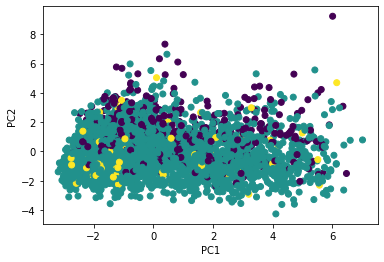

In [8]:
# Plot PCA
plt.scatter(pca_df['PC1'], pca_df['PC2'], c = scaled_data['diabetes'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [9]:
# Identify ideal number of clusters
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,60269.821201
1,2,47963.597274
2,3,44190.298597
3,4,41361.832833
4,5,38849.063049


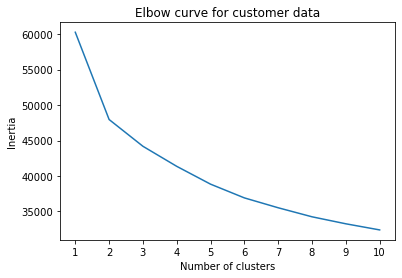

In [10]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [11]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.966684,-0.308323,0.813742,-0.700379,-0.842130,0.167355,0.814752,0.073215,0.028718,-0.452064
1,-2.852979,-1.918193,-0.286826,-0.114393,2.210933,1.113721,0.308385,0.037717,-0.680948,-0.001242
2,2.297466,-2.383742,-2.885251,0.117833,-0.076775,-0.348617,-0.998656,1.443480,-1.636997,-0.887006
3,-1.090625,-1.226355,0.087693,0.554782,-0.186926,0.559870,0.826044,-0.034499,-0.356477,-0.461346
4,0.354499,2.116391,3.044491,1.402427,-0.323244,-1.447152,2.020058,3.583087,0.599632,0.417143
...,...,...,...,...,...,...,...,...,...,...
3436,-1.764973,-1.244428,-0.571887,0.018841,1.036947,1.545525,1.615428,0.236880,0.350469,0.649348
3437,-0.872449,2.117963,-2.189122,0.130049,-1.456088,-1.155167,-1.292922,0.393017,0.061875,1.224985
3438,0.406409,0.166829,0.642359,-1.814514,1.600066,-1.180913,-1.040472,-0.684766,0.145440,0.992966
3439,-1.675171,-0.361309,0.391093,-0.701147,0.176599,-0.266217,0.964965,-0.739503,0.163344,-0.903998


In [12]:
# Initialize the K-Means model
model = KMeans(n_clusters=8, random_state=0)

# Train the model
model.fit(pca_df)

# Predict clusters
predictions = model.predict(pca_df)

# Create return DataFrame with predicted clusters
pca_df["class"] = model.labels_

No handles with labels found to put in legend.


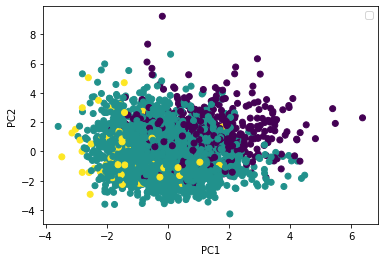

In [13]:
plt.scatter(pca_df['PC4'], pca_df['PC2'], c=data['diabetes'])
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [14]:
# Identify ideal number of clusters
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,96348.000000
1,2,84030.106385
2,3,80208.565883
3,4,77333.519044
4,5,74246.388448


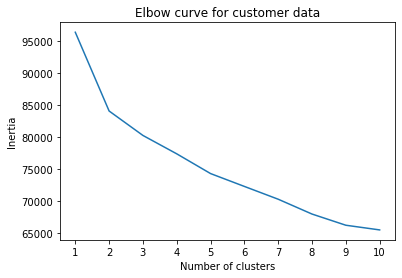

In [15]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [16]:
# Initialize the K-Means model
model = KMeans(n_clusters=8, random_state=0)

# Train the model
model.fit(scaled_data)

# Predict clusters
predictions = model.predict(scaled_data)

# Create return DataFrame with predicted clusters
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
scaled_data["class"] = model.labels_

In [61]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(pca_df)

# The first column of transformed features
pca_df['tnse_1'] = tsne_features[:,0]

# The second column of transformed features
pca_df['tnse_2'] = tsne_features[:,1]

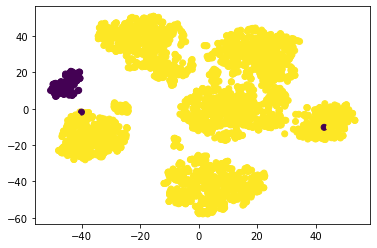

In [62]:
# Visualize the clusters
plt.scatter(pca_df['tnse_1'], pca_df['tnse_2'], c = scaled_data['insulin'])
plt.show()

In [22]:
scaled_data.columns

Index(['diabetes', 'insulin', 'worry_food', 'food_not_last', 'balanced_meals',
       'food_security', 'emergency_food', 'food_stamp', 'monthly_income',
       'family_savings', 'grocery_transport', 'health_insurance', 'pulse',
       'bmi', 'weight', '12mo_alcohol', 'many_drinks_regularly',
       'minutes_sedentary', 'mod_work_activity', 'vig_work_activity',
       'walk_bicycle', 'vig_rec_activity', 'mod_rec_activity', 'height_in',
       '10lb_losses', 'diet_health', 'week_meals_not_home',
       'month_frozen_food', 'class', 'tnse_1', 'tnse_2'],
      dtype='object')

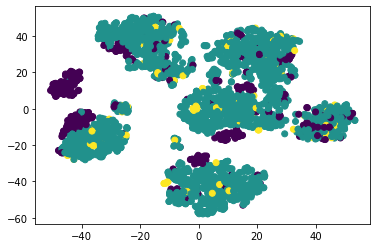

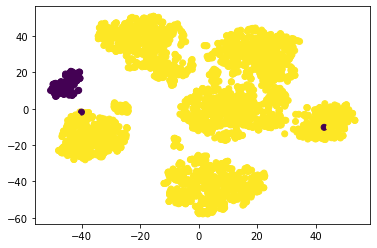

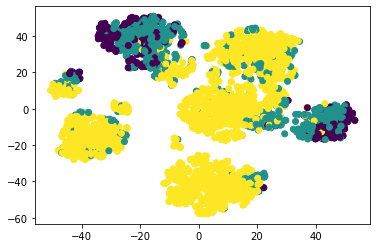

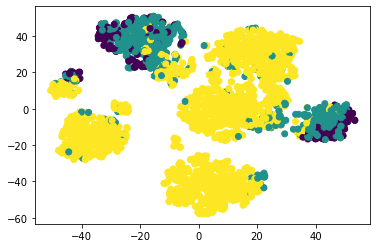

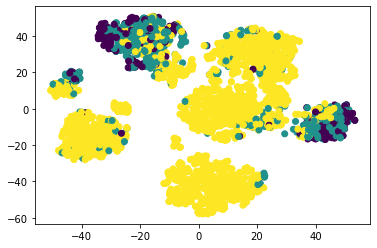

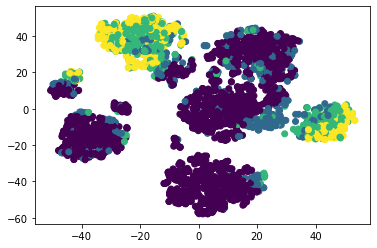

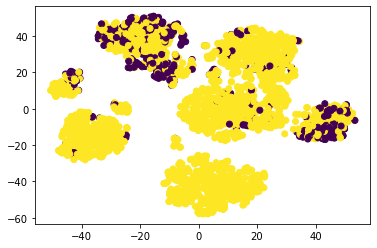

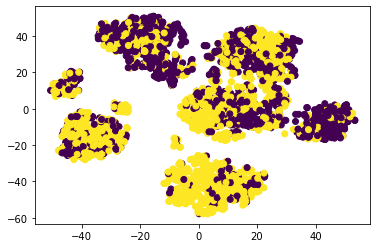

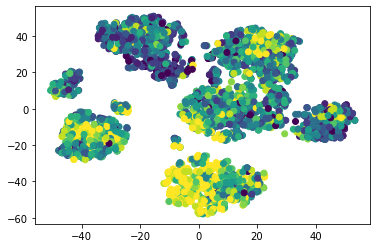

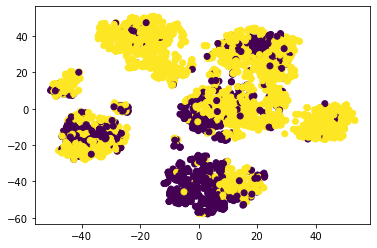

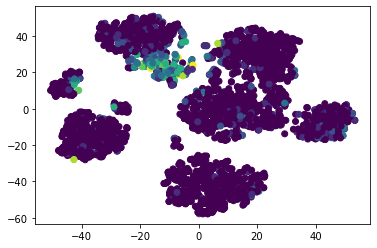

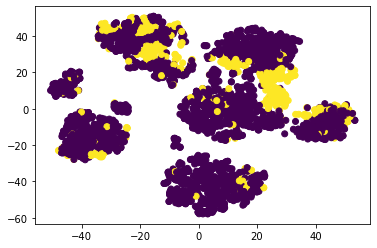

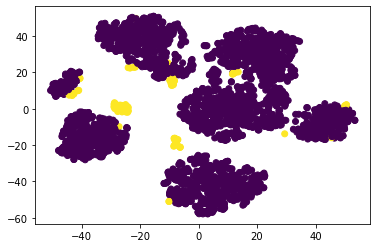

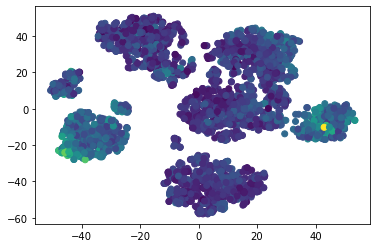

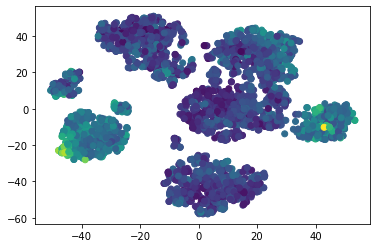

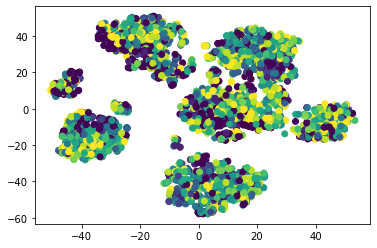

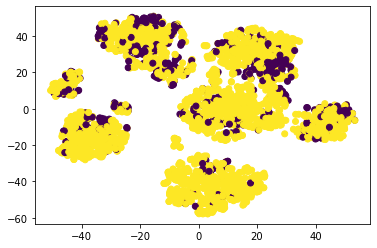

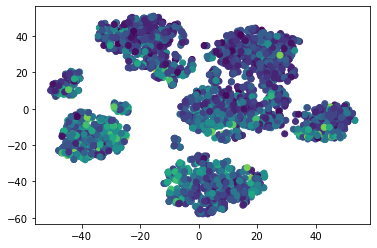

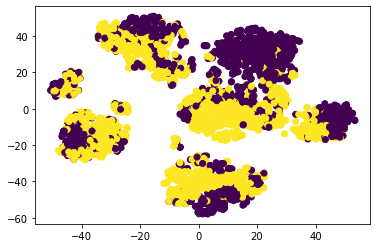

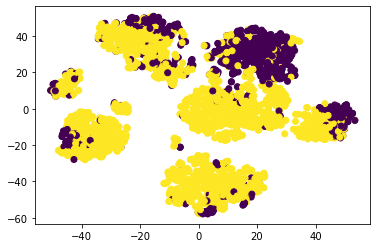

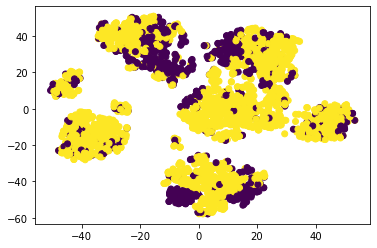

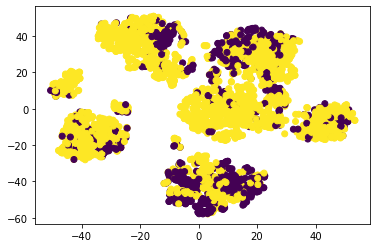

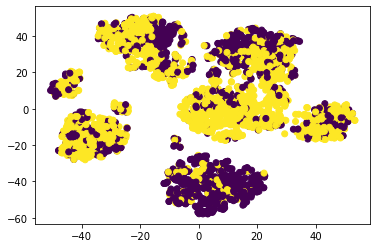

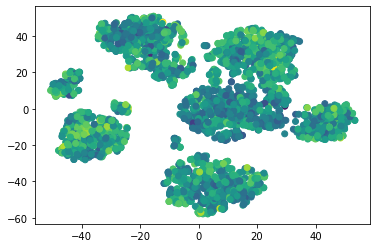

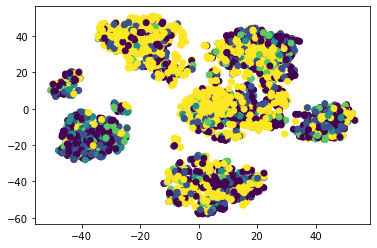

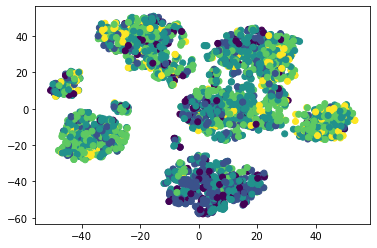

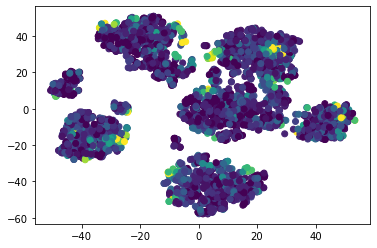

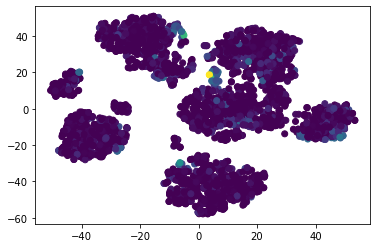

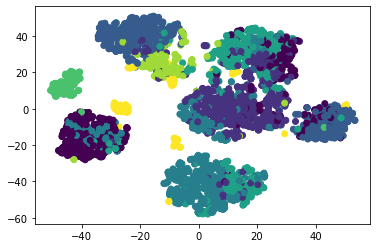

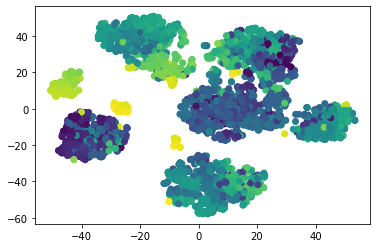

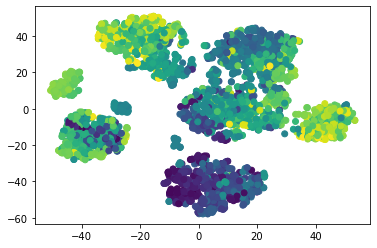

In [79]:
# Visualize the clusters
for var in scaled_data.columns:
    plt.scatter(pca_df['tnse_1'], pca_df['tnse_2'], c = scaled_data[var])
    plt.savefig(f'results/tsne/tsne_{var}.png')
    plt.show()